### Predicting Survival in the Titanic Data Set using the Decission Tree

titanic.columns =
['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ti
cket','Fare','Cabin','E mbarked']

You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch
(Parents/children aboard), and Fare to predict whether a passenger
survived.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Reading the dataset
data = pd.read_csv('titanic-train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# As per the problem statement we need to drop PassengerID,Name,Ticket,Cabin,Embarked columns.
data = data.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],axis = 1)

In [5]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [7]:
data.describe()# Overall description of the dataset

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
data.info()# To check what is the datatype of different columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [10]:
# To check whether any missing values in the data set
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

From the above info we can see that there are null values in the Age column, we will try to impute age column below.

In [14]:
data.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

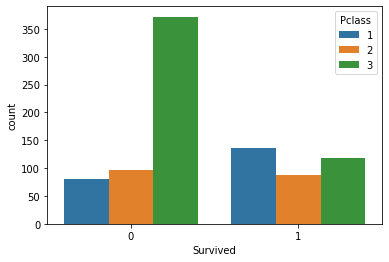

In [15]:
sns.countplot(data['Survived'],hue=data['Pclass'])

In [17]:
data.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

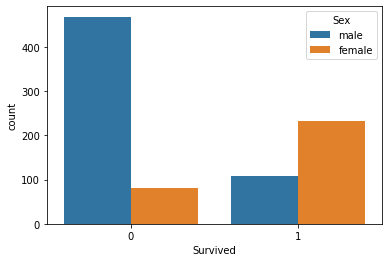

In [18]:
sns.countplot(data['Survived'],hue=data['Sex'])

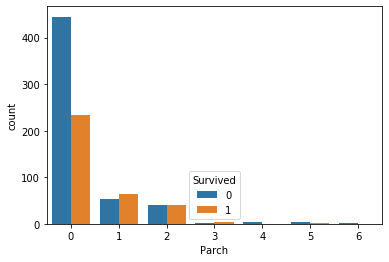

In [19]:
sns.countplot(data['Parch'],hue = data['Survived'])

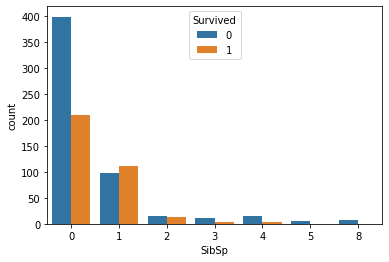

In [20]:
sns.countplot(data['SibSp'],hue=data['Survived'])

In [22]:
#Age column has most of the Nan values lets impute them
data[data['Age'].isnull()]['Pclass'].value_counts()

3    136
1     30
2     11
Name: Pclass, dtype: int64

The people who travelled in Pclass 3 has more missing values for Age column.

We can see that out of 177 Nan values, 136 are from passenger class=3 and 30 from Pclass=1 and 11 from Pclass=2.

In [23]:
data[data['Age'].isnull()]['Sex'].value_counts()

male      124
female     53
Name: Sex, dtype: int64

Most of the missing values are for Male

In [24]:
data.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [25]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 30

        else:
            return 25

    else:
        return Age

In [26]:
data['Age'] = data[['Age','Pclass']].apply(impute_age,axis=1)

In [27]:
data['Sex'] = data['Sex'].map({'female':1,'male':0})

In [28]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [30]:
data.groupby(['SibSp'])['Survived'].mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [31]:
data.groupby(['Parch'])['Survived'].mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

In [32]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [34]:
y = data['Survived']
X = data.drop(['Survived'],axis=1)

In [36]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()

In [39]:
X_scaled = scaler.fit_transform(X)

In [40]:
from sklearn.model_selection import train_test_split

In [97]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state = 0)

In [98]:
from sklearn.tree import DecisionTreeClassifier

In [99]:
classifier = DecisionTreeClassifier()

In [100]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [101]:
y_pred = classifier.predict(X_test)

In [119]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc

In [103]:
print("Training data accuracy :{}".format(classifier.score(X_train,y_train)))
print("Testing data accuracy :{}".format(classifier.score(X_test,y_test)))
print("Testing data accuracy :{}".format(accuracy_score(y_test,y_pred)))
print("Confusion Matrix :\n{}".format(confusion_matrix(y_test,y_pred)))
print("Classification Report :\n{}".format(classification_report(y_test,y_pred)))

Training data accuracy :0.9775280898876404
Testing data accuracy :0.8059701492537313
Testing data accuracy :0.8059701492537313
Confusion Matrix :
[[147  21]
 [ 31  69]]
Classification Report :
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       168
           1       0.77      0.69      0.73       100

    accuracy                           0.81       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.80      0.81      0.80       268



In [120]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)

In [121]:
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7825